In [1]:
!pip install -U scikit-learn

     |████████████████████████████████| 22.3 MB 170 kB/s  eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.4.3 which is incompatible.
hypertools 0.7.0 requires scikit-learn!=0.22,<0.24,>=0.19.1, but you have scikit-learn 0.24.2 which is incompatible.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-classification/mushrooms.csv


In [3]:
plt.rcParams.update({'figure.max_open_warning': 0})
rg_palette = sns.color_palette(palette=["red","green"])
sns.set_theme(style="darkgrid", palette=rg_palette)

In [4]:
df = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.shape

(8124, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
df.isna().sum(axis=0)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

No missing values. All features are categorical (or maybe ordinal)

In [8]:
print('Number of categories per each feature:')
for col in df.columns:
    print(f'{col}: {df[col].nunique()}')

Number of categories per each feature:
class: 2
cap-shape: 6
cap-surface: 4
cap-color: 10
bruises: 2
odor: 9
gill-attachment: 2
gill-spacing: 2
gill-size: 2
gill-color: 12
stalk-shape: 2
stalk-root: 5
stalk-surface-above-ring: 4
stalk-surface-below-ring: 4
stalk-color-above-ring: 9
stalk-color-below-ring: 9
veil-type: 1
veil-color: 4
ring-number: 3
ring-type: 5
spore-print-color: 9
population: 6
habitat: 7


In [9]:
df = df.drop(columns=['veil-type'])

In [10]:
df['class'].value_counts()
# Classes seems balanced

e    4208
p    3916
Name: class, dtype: int64

In [11]:
# similar_distributions:
#   features that show little difference in distribution
#   between poisonous and edible

similar_distributions = [
    "cap-shape",
    "gill-attachment",
    "veil-color",
    "ring-number"
]


# opposite_distributions:
#   features that show opposite distribution
#   between poisonous and edible

opposite_distributions = [
    "bruises",
    "odor",
    "gill-size",
    "spore-print-color"
]


# distinctive_distributions:
#   features that have one or few categories
#   that are distinctive in either
#   poisonous or edible class

distinctive_distributions = [
    "cap-surface",
    "gill-spacing",
    "gill-color",
    "stalk-shape",
    "stalk-root",
    "stalk-surface-above-ring",
    "stalk-surface-below-ring",
    "ring-type",
    "population",
    "habitat"
]

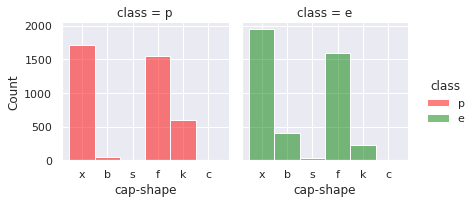

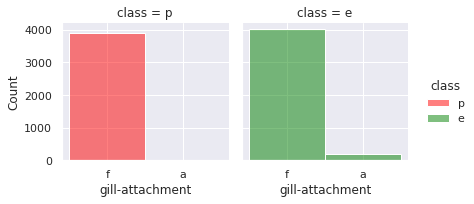

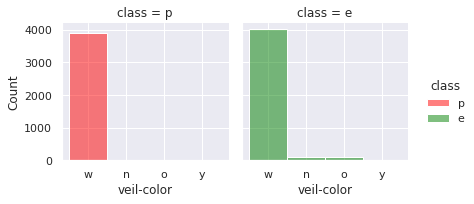

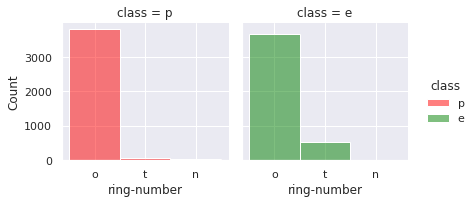

In [12]:
for col in similar_distributions:
    sns.displot(
        df,
        x=col,
        hue="class",
        col="class",
        binwidth=3,
        height=3
    )

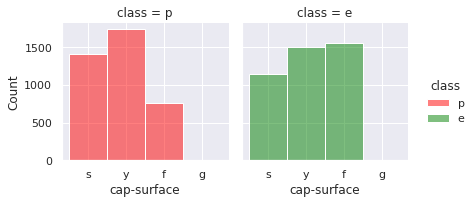

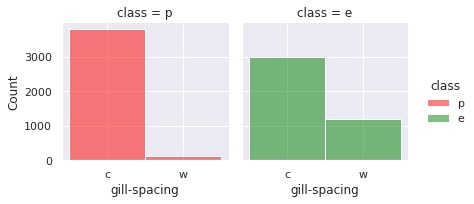

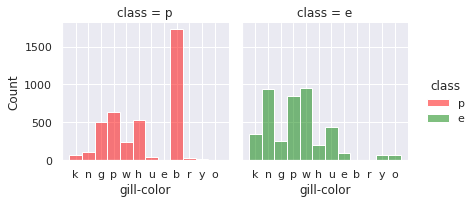

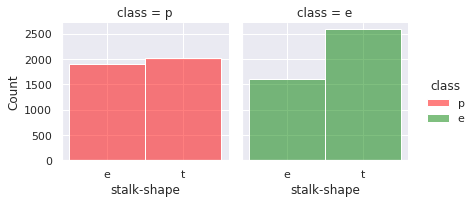

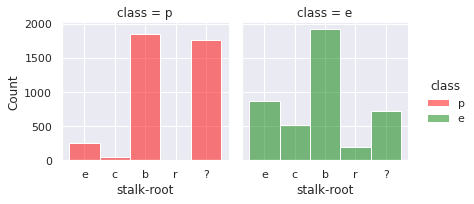

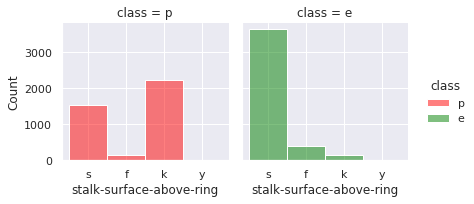

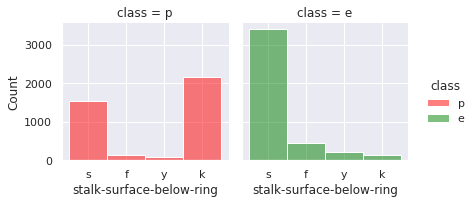

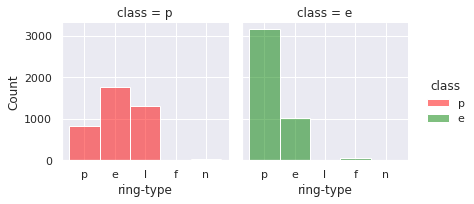

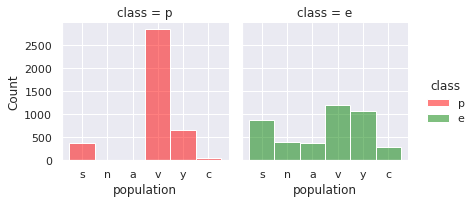

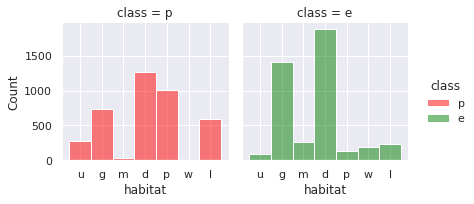

In [13]:
for col in distinctive_distributions:
    sns.displot(
        df,
        x=col,
        hue="class",
        col="class",
        binwidth=3,
        height=3
    )

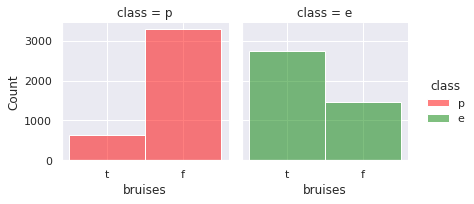

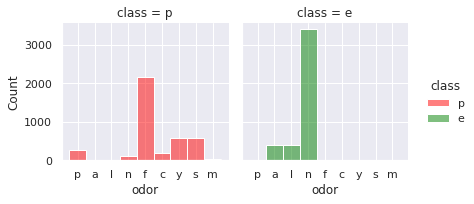

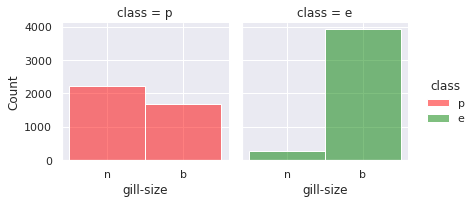

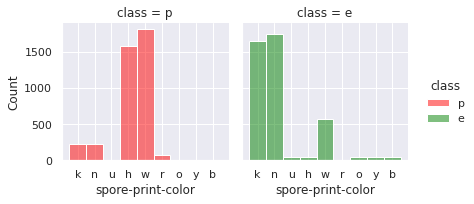

In [14]:
for col in opposite_distributions:
    sns.displot(
        df,
        x=col,
        hue="class",
        col="class",
        binwidth=3,
        height=3
    )

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df_shuffled = df.sample(frac=1)
X, y = df_shuffled.drop(columns=['class']), df_shuffled['class'].copy()
X_train, X_test, y_train, y_test = train_test_split(X.copy(), y.copy(), test_size=0.15, random_state=42)

In [17]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, \
                             GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV, RFE, SelectKBest, chi2, mutual_info_classif

from xgboost import XGBClassifier

In [18]:
categories_for_each_column = [X[col].unique() for col in X]
categories_for_each_column

[array(['x', 'k', 'f', 'b', 's', 'c'], dtype=object),
 array(['f', 's', 'y', 'g'], dtype=object),
 array(['n', 'g', 'e', 'c', 'y', 'w', 'b', 'r', 'p', 'u'], dtype=object),
 array(['t', 'f'], dtype=object),
 array(['n', 'f', 'y', 's', 'a', 'c', 'l', 'm', 'p'], dtype=object),
 array(['f', 'a'], dtype=object),
 array(['c', 'w'], dtype=object),
 array(['b', 'n'], dtype=object),
 array(['u', 'y', 'g', 'w', 'b', 'n', 'p', 'k', 'h', 'o', 'e', 'r'],
       dtype=object),
 array(['t', 'e'], dtype=object),
 array(['b', '?', 'c', 'e', 'r'], dtype=object),
 array(['s', 'k', 'f', 'y'], dtype=object),
 array(['s', 'k', 'f', 'y'], dtype=object),
 array(['w', 'o', 'n', 'p', 'g', 'b', 'c', 'e', 'y'], dtype=object),
 array(['g', 'o', 'b', 'w', 'p', 'n', 'c', 'e', 'y'], dtype=object),
 array(['w', 'o', 'n', 'y'], dtype=object),
 array(['o', 't', 'n'], dtype=object),
 array(['p', 'l', 'e', 'f', 'n'], dtype=object),
 array(['n', 'h', 'w', 'k', 'o', 'u', 'r', 'b', 'y'], dtype=object),
 array(['y', 'v', 's',

In [19]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [20]:
encoder = OneHotEncoder(categories=categories_for_each_column, sparse=False)
pipe = make_pipeline(encoder, SVC())

In [21]:
pipe.fit(X_train, y_train)
y_test_pred = pipe.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       648
           1       1.00      1.00      1.00       571

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [22]:
cross_val_score(pipe, X, y, scoring='accuracy', cv=5)

array([1., 1., 1., 1., 1.])

In [23]:
import itertools

In [24]:
category_names_per_column = [[f'{col}-{category_name}' for category_name in categories_for_each_column[i]] for i, col in enumerate(X.columns)]
# flatten this list
category_names = list(itertools.chain(*category_names_per_column))

In [25]:
X_oh = pd.DataFrame(encoder.transform(X), columns=category_names)
X_oh.head()

,cap-shape-x,cap-shape-k,cap-shape-f,cap-shape-b,cap-shape-s,cap-shape-c,cap-surface-f,cap-surface-s,cap-surface-y,cap-surface-g,...,population-n,population-a,population-c,habitat-d,habitat-l,habitat-g,habitat-p,habitat-m,habitat-u,habitat-w
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

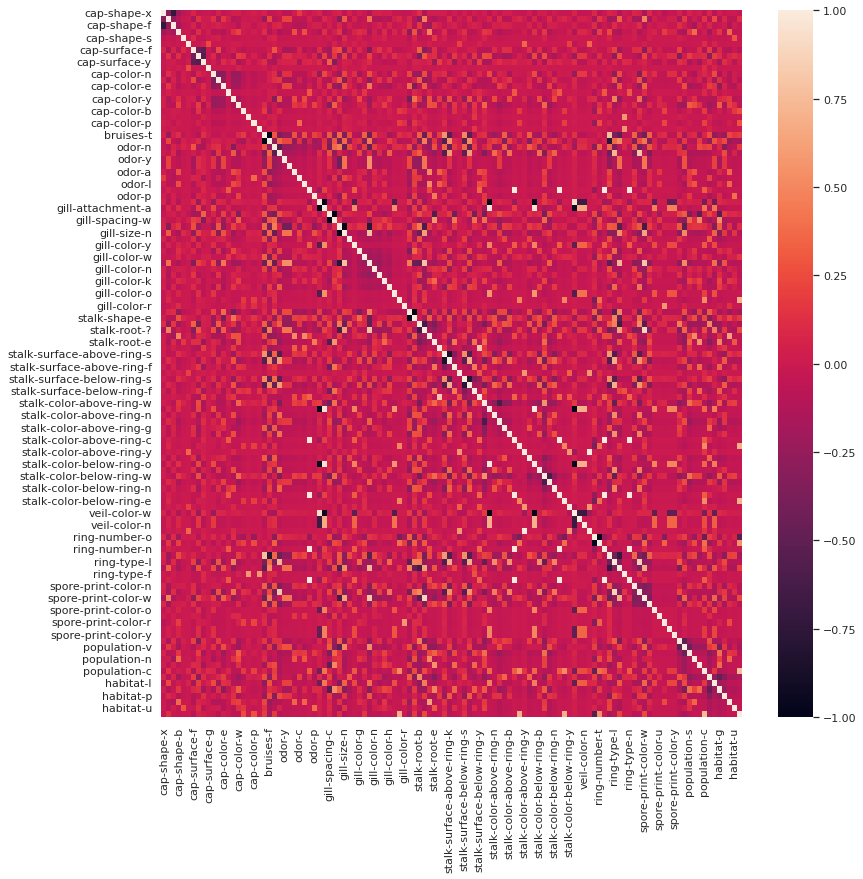

In [26]:
fig, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(X_oh.corr(), vmin=-1, vmax=1, ax=ax)
# We can clearly see, that some of OneHot columns are correlated

In [27]:
def find_correlated_columns(df, threshold):
    corr = df.corr()
    corr_abs = corr.abs()
    col_pair_to_correlation = {}
    for col in df.columns:
        most_correlated_cols = corr.loc[col][corr_abs[col] >= threshold]
        most_correlated_cols = most_correlated_cols.index.drop(col)
        for correlated_col in most_correlated_cols:
            correlation_value = corr.loc[col, correlated_col]
            col_pair_to_correlation[tuple(sorted((col, correlated_col)))] = correlation_value
    return col_pair_to_correlation

In [28]:
find_correlated_columns(X_oh, 0.7)

{('cap-shape-f', 'cap-shape-x'): -0.7202347239357573,
 ('bruises-f', 'bruises-t'): -0.9999999999999998,
 ('bruises-t', 'ring-type-p'): 0.7670361113113329,
 ('bruises-f', 'ring-type-p'): -0.7670361113113328,
 ('odor-f', 'ring-type-l'): 0.7239318535931049,
 ('odor-f', 'spore-print-color-h'): 0.7997515343521002,
 ('odor-m', 'stalk-color-above-ring-c'): 1.0,
 ('odor-m', 'stalk-color-below-ring-c'): 1.0,
 ('odor-m', 'ring-number-n'): 1.0,
 ('odor-m', 'ring-type-n'): 1.0,
 ('gill-attachment-a', 'gill-attachment-f'): -1.0,
 ('gill-attachment-f', 'stalk-color-above-ring-o'): -0.955097343631291,
 ('gill-attachment-f', 'stalk-color-below-ring-o'): -0.955097343631291,
 ('gill-attachment-f', 'veil-color-w'): 0.935237550936388,
 ('gill-attachment-a', 'stalk-color-above-ring-o'): 0.9550973436312905,
 ('gill-attachment-a', 'stalk-color-below-ring-o'): 0.9550973436312905,
 ('gill-attachment-a', 'veil-color-w'): -0.9352375509363883,
 ('gill-spacing-c', 'gill-spacing-w'): -1.0000000000000007,
 ('gill-si

In [32]:
num_jobs = -1
classifier_list = [LogisticRegression(n_jobs=num_jobs), 
                   SGDClassifier(alpha=0.01, n_jobs=num_jobs), 
                   DecisionTreeClassifier(), 
                   ExtraTreeClassifier(max_depth=5, min_samples_split=10, splitter='random'), 
                   RandomForestClassifier(n_estimators=100, n_jobs=num_jobs), 
#                    SVC(shrinking=True, kernel='rbf'), 
#                    XGBClassifier(booster='gbtree', use_label_encoder=False, n_jobs=num_jobs), 
                   GradientBoostingClassifier(n_estimators=100, loss='deviance'), 
#                    AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=50)
]

In [33]:
classifiers = []
rankings = []

In [34]:
for i in range(len(classifier_list)):
    print(f'{i} out of {len(classifier_list)}')
    classifier = classifier_list[i]
#     if getattr(classifier, 'coef_', None) is None and getattr(classifier, 'feature_importances_', None) is None:
#         print(f'Skipping {classifier}')
    rfe = RFE(classifier, n_features_to_select=1, step=1, verbose=0)
    rfe.fit(X_oh, y)
    rankings.append(rfe.ranking_)
    classifiers.append(classifier)
print('Done')

0 out of 6
1 out of 6
2 out of 6
3 out of 6
4 out of 6
5 out of 6
Done


In [35]:
classifiers

[LogisticRegression(n_jobs=-1),
 SGDClassifier(alpha=0.01, n_jobs=-1),
 DecisionTreeClassifier(),
 ExtraTreeClassifier(max_depth=5, min_samples_split=10),
 RandomForestClassifier(n_jobs=-1),
 GradientBoostingClassifier()]

In [36]:
rankings

[array([ 97, 114, 106,  66,  57,  53,  33,  89, 108,  36,  67, 115, 112,
         42,  86,  43,  40,  69,  41,  70,  98,  87,   3,   6,  26,  27,
          2,  12,   1,  58,  11,  95,  94,  16,  21,  15,   7,  82,  93,
        113,  74,  17,  61,  73,  72, 105,  99,  55,  38,  25,  48,  19,
         44,  46, 109,  34,  32,   8,  39, 103,  47,  64,  29,  22, 111,
         56,  90,  81,  63,  88,  75,  54,  37,  62,  51,  96,  78,  77,
         24,  68,  52,   5,  85,  91,  92,  49, 110,  84,  76, 107,  50,
         45,  14,  65,  10,  28,  83,  13, 101,   9,   4, 102, 100,  23,
         80,  79,  35, 116,  18,  59, 104,  31,  60,  30,  71,  20]),
 array([100, 101, 102,  80,  34,  70,  33,  87,  95,  73,  89, 106, 110,
         53,  71, 108,  27,  51,  25,  52,  46,  84,   3,   7,  31,  30,
          2,   8,   1,  47,   6, 107, 104,  17,  11,  10,  23,  69,  86,
         68,  64,   5,  65,  66,  67,  78, 111,  63,  18,  32,  60,  12,
         72,  39,  99,  21,  28,   9,  29,  75,  81, 1

In [37]:
def estimator_name(estimator):
    str_representation = str(estimator)
    end_of_name_index = str_representation.index('(')
    return str_representation[:end_of_name_index]

estimator_name(classifier_list[0])

'LogisticRegression'

In [100]:
d = {'feature': X_oh.columns}
for classifier, ranks in zip(classifiers, rankings):
    d[estimator_name(classifier)] = ranks
feature_rankings = pd.DataFrame(d)
feature_rankings

,feature,LogisticRegression,SGDClassifier,DecisionTreeClassifier,ExtraTreeClassifier,RandomForestClassifier,GradientBoostingClassifier
0,cap-shape-x,97,100,116,116,69,116
1,cap-shape-k,114,101,115,115,95,115
2,cap-shape-f,106,102,114,114,81,45
3,cap-shape-b,66,80,113,113,51,64
4,cap-shape-s,57,34,112,112,84,61
...,...,...,...,...,...,...,...
111,habitat-g,31,42,98,7,37,43
112,habitat-p,60,62,101,17,59,60
113,habitat-m,30,41,102,19,47,52
114,habitat-u,71,43,103,43,23,37


In [101]:
summed_rankings = feature_rankings.select_dtypes(int).sum(axis=1)
summed_rankings

0      614
1      655
2      562
3      487
4      460
      ... 
111    258
112    359
113    291
114    320
115    376
Length: 116, dtype: int64

In [102]:
sorted_rankings = [0] * len(summed_rankings)
for i, x in enumerate(sorted(range(len(summed_rankings)), key=lambda y: summed_rankings[y])):
    sorted_rankings[x] = i + 1  # offset so that lowest rank is 1
sorted_rankings[:10]

[115, 116, 114, 101, 94, 62, 36, 73, 87, 46]

In [103]:
feature_rankings['overall_ranking'] = sorted_rankings
feature_rankings

,feature,LogisticRegression,SGDClassifier,DecisionTreeClassifier,ExtraTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,overall_ranking
0,cap-shape-x,97,100,116,116,69,116,115
1,cap-shape-k,114,101,115,115,95,115,116
2,cap-shape-f,106,102,114,114,81,45,114
3,cap-shape-b,66,80,113,113,51,64,101
4,cap-shape-s,57,34,112,112,84,61,94
...,...,...,...,...,...,...,...,...
111,habitat-g,31,42,98,7,37,43,26
112,habitat-p,60,62,101,17,59,60,58
113,habitat-m,30,41,102,19,47,52,34
114,habitat-u,71,43,103,43,23,37,44


In [104]:
feature_rankings.sort_values(by='overall_ranking', inplace=True)
feature_rankings.head()

,feature,LogisticRegression,SGDClassifier,DecisionTreeClassifier,ExtraTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,overall_ranking
100,spore-print-color-r,4,4,4,18,11,7,1
22,odor-n,3,3,1,92,1,1,2
63,stalk-surface-below-ring-y,22,22,3,36,25,3,3
36,gill-size-n,7,23,8,77,5,11,4
26,odor-a,2,2,6,88,33,4,5


In [105]:
feature_rankings = feature_rankings.set_index('feature')
feature_rankings.head(10)

,LogisticRegression,SGDClassifier,DecisionTreeClassifier,ExtraTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,overall_ranking
feature,,,,,,,
spore-print-color-r,4,4,4,18,11,7,1
odor-n,3,3,1,92,1,1,2
stalk-surface-below-ring-y,22,22,3,36,25,3,3
gill-size-n,7,23,8,77,5,11,4
odor-a,2,2,6,88,33,4,5
odor-l,1,1,5,86,39,5,6
spore-print-color-h,28,44,67,2,6,8,7
spore-print-color-u,9,13,11,28,62,33,8
stalk-root-c,46,39,2,57,22,2,9


In [94]:
print(distinctive_distributions)
print(opposite_distributions)

['cap-surface', 'gill-spacing', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'ring-type', 'population', 'habitat']
['bruises', 'odor', 'gill-size', 'spore-print-color']


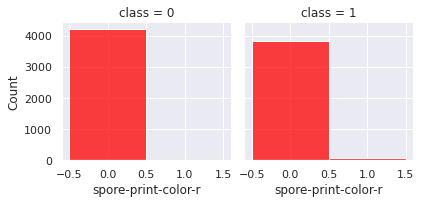

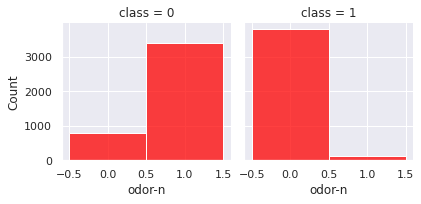

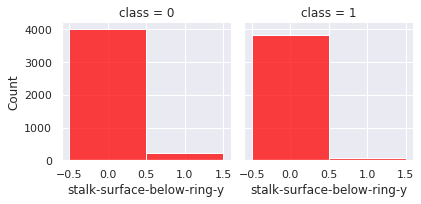

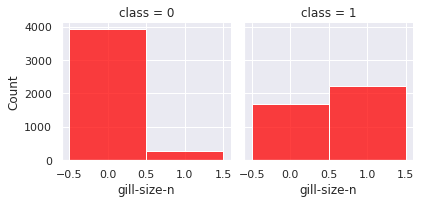

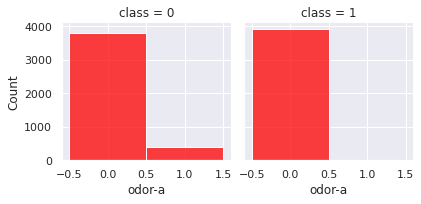

In [95]:
df_oh = pd.concat([X_oh.astype('category'), pd.Series(y, name='class')], axis=1)
for col in feature_rankings.index[:5]:
    sns.displot(
        data=df_oh,
        x=col,
        col="class",
        binwidth=3,
        height=3
    )

In [98]:
# if spore-print-color-r == 0, then it's 100% class 1
df_oh.groupby(['class', 'spore-print-color-r'])['class'].count()

class  spore-print-color-r
0      0.0                    4208
       1.0                       0
1      0.0                    3844
       1.0                      72
Name: class, dtype: int64

In [73]:
fig = go.Figure()
fig.update_layout(
    autosize=False,
    width=1400,
    height=700,
    yaxis={
         'title_text': 'Relative importance'
    }
)

for feature_name in feature_rankings.index:
    fig.add_trace(go.Box(
        name=feature_name,
        y=feature_rankings.loc[feature_name],
        text=feature_rankings.columns,
        showlegend=False
    ))

fig.show()

In [60]:
validation_scores = feature_rankings.copy()
for classifier in classifiers:
    classifier_name = estimator_name(classifier)
    print(f'Cross validating {classifier_name}')
    sorted_features = feature_rankings[classifier_name].sort_values()
    score_means = []
    score_stds = []
    for i in range(len(sorted_features)):
        reduced_feature_subset = sorted_features.index[:i+1]
        scores = cross_val_score(classifier, X_oh[reduced_feature_subset], y, scoring='accuracy', cv=5, n_jobs=-1)
        score_means.append(scores.mean())
        score_stds.append(scores.std())
    classifier_scores = pd.DataFrame({
        f'{classifier_name}_accuracy_mean': score_means,
        f'{classifier_name}_accuracy_std': score_stds,
    }, index=sorted_features.index)
    validation_scores = validation_scores.join(classifier_scores, how='inner')
    assert len(validation_scores) == len(X_oh.columns)
validation_scores

Cross validating LogisticRegression
Cross validating SGDClassifier
Cross validating DecisionTreeClassifier
Cross validating ExtraTreeClassifier
Cross validating RandomForestClassifier
Cross validating GradientBoostingClassifier


,LogisticRegression,SGDClassifier,DecisionTreeClassifier,ExtraTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,overall_ranking,LogisticRegression_accuracy_mean,LogisticRegression_accuracy_std,SGDClassifier_accuracy_mean,SGDClassifier_accuracy_std,DecisionTreeClassifier_accuracy_mean,DecisionTreeClassifier_accuracy_std,ExtraTreeClassifier_accuracy_mean,ExtraTreeClassifier_accuracy_std,RandomForestClassifier_accuracy_mean,RandomForestClassifier_accuracy_std,GradientBoostingClassifier_accuracy_mean,GradientBoostingClassifier_accuracy_std
feature,,,,,,,,,,,,,,,,,,,
spore-print-color-r,4,4,4,18,11,7,1,0.994092,0.001537,0.985229,0.002302,0.985229,0.004081,0.872975,0.063143,0.999015,0.000301,0.997046,0.001059
odor-n,3,3,1,92,1,1,2,0.985229,0.002302,0.985229,0.002302,0.886756,0.003354,0.966153,0.019447,0.886756,0.003354,0.886756,0.003354
stalk-surface-below-ring-y,22,22,3,36,25,3,3,0.999015,0.000628,0.998031,0.000904,0.976367,0.004446,0.864356,0.032583,1.000000,0.000000,0.976367,0.004446
gill-size-n,7,23,8,77,5,11,4,0.997046,0.000603,0.998031,0.000904,1.000000,0.000000,0.923312,0.030804,0.977351,0.004544,1.000000,0.000000
odor-a,2,2,6,88,33,4,5,0.580502,0.003315,0.580502,0.003315,0.997046,0.001059,0.959374,0.022703,1.000000,0.000000,0.982275,0.002707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
stalk-color-above-ring-b,88,109,25,93,113,107,112,1.000000,0.000000,0.996677,0.001000,1.000000,0.000000,0.955316,0.009122,1.000000,0.000000,1.000000,0.000000
gill-attachment-a,94,104,58,81,116,97,113,1.000000,0.000000,0.996800,0.000904,1.000000,0.000000,0.952981,0.019405,1.000000,0.000000,1.000000,0.000000
cap-shape-f,106,102,114,114,81,45,114,1.000000,0.000000,0.997046,0.001059,1.000000,0.000000,0.956553,0.028222,1.000000,0.000000,1.000000,0.000000


In [61]:
fig = make_subplots(
    rows=len(classifiers),
    cols=1,
    vertical_spacing=0.1,
    subplot_titles=[estimator_name(classifier) for classifier in classifiers]
)
fig.update_layout(
    autosize=False,
    width=1400,
    height=2200,
)

for i, classifier in enumerate(classifiers):
    classifier_name = estimator_name(classifier)
    fig.update_yaxes(title_text="Accuracy", range=[0, 1.1], row=i+1, col=1)
    scores_sorted_by_feature_ranking = validation_scores.sort_values(by=classifier_name)
    accuracy_mean = scores_sorted_by_feature_ranking[f'{classifier_name}_accuracy_mean']
    accuracy_std = scores_sorted_by_feature_ranking[f'{classifier_name}_accuracy_std']
    # print STD area + mean line
    fig.add_trace(go.Scatter(
        x=scores_sorted_by_feature_ranking.index.tolist() + scores_sorted_by_feature_ranking.index.tolist()[::-1],
        y=(accuracy_mean+accuracy_std).tolist() + (accuracy_mean-accuracy_std).tolist()[::-1],
        fill='toself'
    ), row=i+1, col=1)
    fig.add_trace(go.Scatter(
        x=scores_sorted_by_feature_ranking.index,
        y=accuracy_mean,
        showlegend=False
    ), row=i+1, col=1)

fig.show()